<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 1:</h3>
  <p>Now it's your turn to build a simple network, use any method I've covered so far. In the next notebook, you'll learn how to train a network so it can make good predictions.</p>
  <p>Build a network to classify the MNIST images with 3 hidden layers. Use 400 units in the first hidden layer, 200 units in the second layer, and 100 units in the third layer. Each hidden layer should have a ReLU activation function, and use softmax on the output layer.</p>
<div>

In [1]:
# importing modules
import torch as T
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms 

import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
## Step-2- Loading the data and splitting it to train and test data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5),(0.5)) ])

## Download & load training data using torchvision datasets
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = T.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

## Download & load training data using torchvision datasets
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = T.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


In [3]:
## Splitting the data into features and target
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [4]:
labels.shape

torch.Size([64])

In [5]:
#### step-3 : Creating network model.

class Classifier(nn.Module):
    # Deining layers
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(784,600)
        self.hidden1 = nn.Linear(600,400)
        self.hidden2 = nn.Linear(400,200)
        self.hidden3 = nn.Linear(200,100)
        self.output_layer = nn.Linear(100,10)

    # forward pass through the network
    def forward(self, x):
        first_layer = self.input_layer(x)
        act1 = F.relu(first_layer)
        second_layer = self.hidden1(act1)
        act2 = F.relu(second_layer)
        third_layer = self.hidden2(act2)
        act3 = F.relu(third_layer)
        fourth_layer = self.hidden3(act3)
        act4 = F.relu(fourth_layer)
        out_layer = self.output_layer(act4)
        #x = F.softmax(out_layer, dim=1)
        return out_layer
    
model = Classifier()
model

Classifier(
  (input_layer): Linear(in_features=784, out_features=600, bias=True)
  (hidden1): Linear(in_features=600, out_features=400, bias=True)
  (hidden2): Linear(in_features=400, out_features=200, bias=True)
  (hidden3): Linear(in_features=200, out_features=100, bias=True)
  (output_layer): Linear(in_features=100, out_features=10, bias=True)
)

In [6]:
# ### Step-4 set bias of first layer to zero
# model.input_layer.bias.data.fill_(0)
# # sample from random normal with standard dev = 0.01
# model.input_layer.weight.data.normal_(std=0.01)

In [7]:
### step-5 : Creating optimizer and criterion
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [11]:
#### Step-6 : Training loop for the model.

epochs = 20
print_every = 40
epoch_mean_loss =0

for epoch in range(epochs):
    running_loss = 0
    loss_list = []
    print(f"Epoch: {epoch+1}/{epochs}")

    for i, (images, labels) in enumerate(iter(trainloader)):

        images.resize_(images.size()[0],784)

        ### Step-1 in training loop - reset the gradients
        optimizer.zero_grad()

        logits = model.forward(images) ### step-2 forward pass
       

        pred = F.log_softmax(logits, dim=1)
        loss = criterion(pred, labels) ### step-3 Compute loss

        loss.backward()              ### step-4 Backward pass
        optimizer.step()                ### step-5 update the model

        loss_list.append(loss.item())
        running_loss += loss.item()

        if i%print_every ==0:
            print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
            running_loss=0
        
    total_sum = sum(loss_list)
    mean_loss = round((total_sum/len(loss_list)),2)
    print(f'End of epoch {epoch}')
    print(mean_loss)
    print(epoch_mean_loss)
    if mean_loss != epoch_mean_loss:
        epoch_mean_loss = mean_loss
    else:
        break
    


Epoch: 1/20
End of epoch 0
0.19
0
Epoch: 2/20
End of epoch 1
0.18
0.19
Epoch: 3/20
End of epoch 2
0.17
0.18
Epoch: 4/20
End of epoch 3
0.17
0.17


In [9]:
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

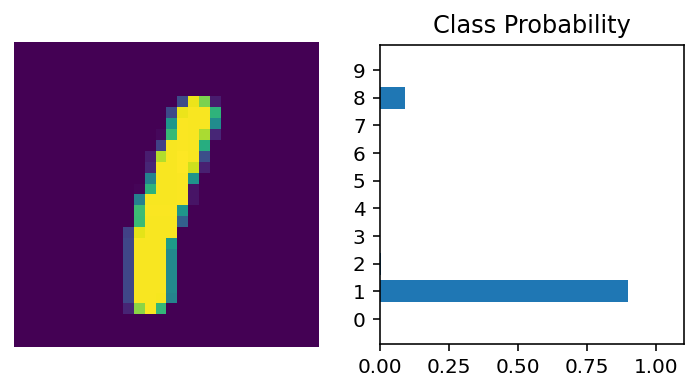

In [10]:
### Step-7 testing the model
images, labels = next(iter(testloader))

img = images[28].view(1,784)
# Turn off gradients to speed up this part
with T.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
view_classify(img.view(1, 28, 28), ps)